# 1. Importing required libraries and dataset
- All data are imported as tables
- Display first 5 rows of the tables

In [82]:
#importing required libraries
import numpy as np
import pandas as pd
#importing all the data as table and tranferring to data frames
dataset1=pd.read_csv('data/raw/Hospitalisation_details.csv')
df_Hospitalisation_details = pd.DataFrame(dataset1)
dataset2=pd.read_csv('data/raw/Medical_Examinations.csv')
df_Medical_Examinations = pd.DataFrame(dataset2)
dataset3=pd.read_excel('data/raw/Names.xlsx')
df_Names = pd.DataFrame(dataset3)
print('Table of Hospitalisation details (first 5 rows):')
print(df_Hospitalisation_details.head(5))
print('                                ')
print('Table of Medical Examinations:')
print(df_Medical_Examinations.head(5))
print('                                ')
print('Table of Names:')
print(df_Names.head(5))

Table of Hospitalisation details (first 5 rows):
  Customer ID  year month  date  children  charges Hospital tier City tier  \
0      Id2335  1992   Jul     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992   Nov    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993   Jun    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992   Sep    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998   Jul    27         0   637.26      tier - 3  tier - 3   

  State ID  
0    R1013  
1    R1013  
2    R1013  
3    R1013  
4    R1013  
                                
Table of Medical Examinations:
  Customer ID     BMI  HBA1C Heart Issues Any Transplants Cancer history  \
0         Id1  47.410   7.47           No              No             No   
1         Id2  30.360   5.77           No              No             No   
2         Id3  34.485  11.87          yes              No             No   
3         Id4  38.095   6.05        

**Above results show that the data imported corrctly**

# 2. Check for missing values

In [83]:
#Find number of missing values (NaN) for each column  
k1=df_Hospitalisation_details.isnull().sum()
k2=df_Medical_Examinations.isnull().sum()
k3=df_Names.isnull().sum()
print('Number of missing values (NaN) for each column in Hospitalisation details: ')
print(k1)
print('                                ')
print('Number of missing values (NaN) for each column in Medical Examinations: ')
print(k2)
print('                                ')
print('Number of missing values (NaN) for each column in Names: ')
print(k3)

Number of missing values (NaN) for each column in Hospitalisation details: 
Customer ID      0
year             0
month            0
date             0
children         0
charges          0
Hospital tier    0
City tier        0
State ID         0
dtype: int64
                                
Number of missing values (NaN) for each column in Medical Examinations: 
Customer ID               0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64
                                
Number of missing values (NaN) for each column in Names: 
Customer ID    0
name           0
dtype: int64


**According to above results, no misssing values (NaN) found in the data**

# 3. Find percentage of rows containing trivial value (?) and drop them if possible
- Handle missing values by identifying rows with ? and dropping them if they contained no significant information

In [84]:
# Find Percentage of rows with trivial values ( for example, ?) in the three tables:
print('Percentage of rows with trivial values (?) in table of Hospitalisation Details: ')
print(df_Hospitalisation_details.isin(['?']).any(axis=1).sum()/(np.shape(df_Hospitalisation_details)[0])*100)
print('                                                                             ')
print('Percentage of rows with trivial values (?) in table of Medical Examinations: ')
print(df_Medical_Examinations.isin(['?']).any(axis=1).sum()/(np.shape(df_Medical_Examinations)[0])*100)
print('                                                                             ')
print('Percentage of rows with trivial values (?) in table of Names: ')
print(df_Names.isin(['?']).any(axis=1).sum()/(np.shape(df_Names)[0])*100) 
print('                                                                             ')
#Drops rows with trivial values (?) in the three tables:
df_Hospitalisation_details = (
    df_Hospitalisation_details.replace('?', np.nan)
    .dropna()
    .reset_index(drop=True))
df_Medical_Examinations = (
    df_Medical_Examinations.replace('?', np.nan)
    .dropna()
    .reset_index(drop=True))


Percentage of rows with trivial values (?) in table of Hospitalisation Details: 
0.597524541186513
                                                                             
Percentage of rows with trivial values (?) in table of Medical Examinations: 
0.08565310492505353
                                                                             
Percentage of rows with trivial values (?) in table of Names: 
0.0
                                                                             


**Dropped rows containing trivial values (?) since they represented only a small percentage of the dataset and did not contain significant information**

# 4. Encode ordinal and categorical variables into numeric representations to enable further process and machine learning model processing
- Categorical variables are converted to numerical values
- Converted variables are inspected and cleaned if needed

In [85]:
# Converting ordinal columns of Hospitalisation details table to numbers:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
OEC1=OrdinalEncoder(categories=[['tier - 1', 'tier - 2', 'tier - 3']])
df_Hospitalisation_details[['Hospital tier']]=OEC1.fit_transform(df_Hospitalisation_details[['Hospital tier']])
df_Hospitalisation_details[['City tier']]= OEC1.fit_transform(df_Hospitalisation_details[['City tier']])
# Converting nominal columns of Hospitalisation details table to numbers:
OHE=OneHotEncoder(sparse_output=False)
Encoder=OHE.fit_transform(df_Hospitalisation_details[['State ID']])
feature_names=OHE.get_feature_names_out(['State ID'])
# Create DataFrame
encoded_df = pd.DataFrame(Encoder, columns=feature_names)
df_Hospitalisation_details = pd.concat([df_Hospitalisation_details, encoded_df], axis=1).drop('State ID', axis=1)
# Converting ordinal columns of Medical_Examinations table to numbers:
OHE=OneHotEncoder(sparse_output=False)
encoder=OHE.fit_transform(df_Medical_Examinations[['Heart Issues']])
feature_name=OHE.get_feature_names_out(['Heart Issues'])
encoded_df = pd.DataFrame(encoder, columns=feature_name)
df_Medical_Examinations = pd.concat([df_Medical_Examinations, encoded_df], axis=1).drop('Heart Issues', axis=1)
encoder=OHE.fit_transform(df_Medical_Examinations[['smoker']])
feature_name=OHE.get_feature_names_out(['smoker'])
encoded_df=pd.DataFrame(encoder,columns=feature_name)
df_Medical_Examinations = pd.concat([df_Medical_Examinations, encoded_df], axis=1).drop('smoker', axis=1)
encoder=OHE.fit_transform(df_Medical_Examinations[['Any Transplants']])
feature_name=OHE.get_feature_names_out(['Any Transplants'])
encoded_df=pd.DataFrame(encoder,columns=feature_name)
df_Medical_Examinations = pd.concat([df_Medical_Examinations, encoded_df], axis=1).drop('Any Transplants', axis=1)
encoder=OHE.fit_transform(df_Medical_Examinations[['Cancer history']])
feature_name=OHE.get_feature_names_out(['Cancer history'])
encoded_df=pd.DataFrame(encoder,columns=feature_name)
df_Medical_Examinations = pd.concat([df_Medical_Examinations, encoded_df], axis=1).drop('Cancer history', axis=1)


# 5. Remove irrelevant or low-impact columns to improve model performance and reduce noise

In [86]:
# Since only R1011, R1012, R1013 worth to keep from State ID, 
# All other columns related to values of State ID will be dropped!
df_Hospitalisation_details.drop(['State ID_R1014','State ID_R1015', 'State ID_R1016', 'State ID_R1017',
                                 'State ID_R1018','State ID_R1019', 'State ID_R1020', 'State ID_R1021',
                                 'State ID_R1022','State ID_R1023', 'State ID_R1024', 'State ID_R1025', 'State ID_R1026'], axis=1, inplace=True)


# 6. Cleaning `NumberOfMajorSurgeries` variable

In [87]:
# clean up NumberOfMajorSurgeries variable by making all data same type 
OEC1=OrdinalEncoder(categories=[['2', 'No major surgery', '3', '1']])
df_Medical_Examinations[['NumberOfMajorSurgeries']]=OEC1.fit_transform(df_Medical_Examinations[['NumberOfMajorSurgeries']])


# 7. Create a new column for age of patients and calcuate it from patient_age

In [88]:
#Calculate age of patients and add as a new column
df_Hospitalisation_details['patient age']=2025 - pd.to_numeric(df_Hospitalisation_details['year'])
print('First five rows of data after adding column for patinet age ')
print(df_Hospitalisation_details.head(5))


First five rows of data after adding column for patinet age 
  Customer ID  year month  date  children  charges  Hospital tier  City tier  \
0      Id2335  1992   Jul     9         0   563.84            1.0        2.0   
1      Id2334  1992   Nov    30         0   570.62            1.0        0.0   
2      Id2333  1993   Jun    30         0   600.00            1.0        0.0   
3      Id2332  1992   Sep    13         0   604.54            2.0        2.0   
4      Id2331  1998   Jul    27         0   637.26            2.0        2.0   

   State ID_R1011  State ID_R1012  State ID_R1013  patient age  
0             0.0             0.0             1.0           33  
1             0.0             0.0             1.0           33  
2             0.0             0.0             1.0           32  
3             0.0             0.0             1.0           33  
4             0.0             0.0             1.0           27  


# 8. Create a new column for gender of patients

In [89]:
# Split into two new columns and genrate gender column
df_Names[['last_name', 'first_name']] = df_Names['name'].str.split(',', expand=True)
df_Names.drop('name', axis=1, inplace=True)
df_Names['gender'] = df_Names['first_name'].map( lambda x: 'f' if 'Ms.' in str(x) else 'm')


# 9. histogram, box plot and swarm plot of cost 

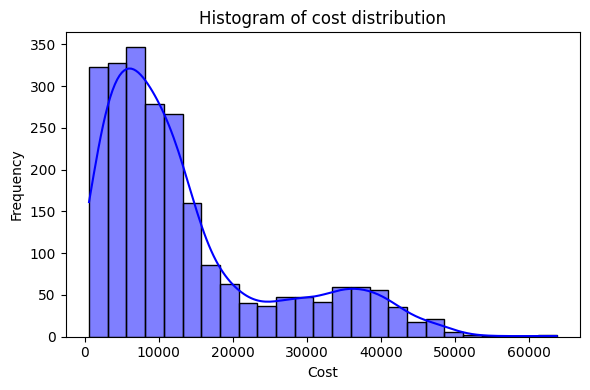

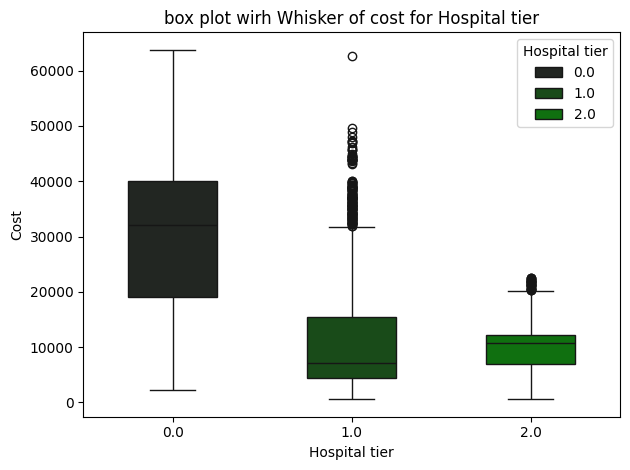

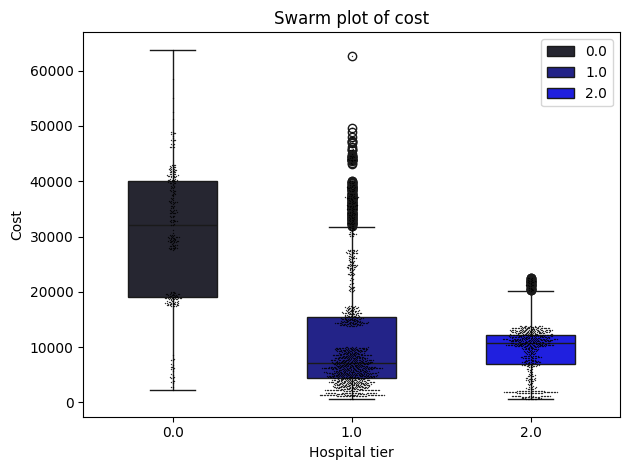

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of cost
plt.figure(figsize=(6,4))
sns.histplot(data=df_Hospitalisation_details, x='charges', bins=25, kde=True, color= 'blue' )
plt.title('Histogram of cost distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('plots/Histogram.png')
plt.show()
# box plot wirh Whisker of cost
sns.boxplot(data=df_Hospitalisation_details, x='Hospital tier', y='charges', palette='dark:green', width=0.5, hue='Hospital tier')
plt.title('box plot wirh Whisker of cost for Hospital tier')
plt.xlabel('Hospital tier')
plt.ylabel('Cost')
plt.tight_layout()
plt.savefig('plots/Box_plot_whisker.png')
plt.show()
# Swarm plot of cost
sns.boxplot(data=df_Hospitalisation_details, x='Hospital tier', y='charges', palette='dark:blue', width=0.5, hue='Hospital tier')
sns.swarmplot(data=df_Hospitalisation_details, x='Hospital tier', y='charges', color='black', alpha=0.8, size=1)
plt.title('Swarm plot of cost')
plt.xlabel('Hospital tier')
plt.ylabel('Cost')
plt.tight_layout()
plt.savefig('plots/Swarm_Plots.png')
plt.show()

# 10. Cost Distribution of charges across hospital tier and gender

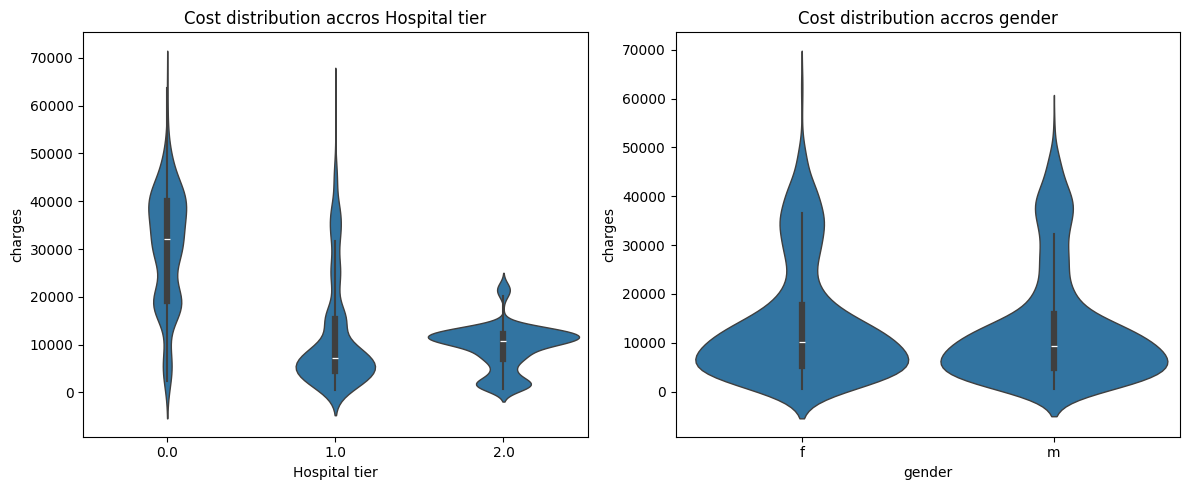

In [91]:
# Cost distribution accros gender and hospital tier 
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # width, height in inches
# First plot (Box Plot)
sns.violinplot(data=df_Hospitalisation_details, x='Hospital tier', y='charges', inner="box", linewidth=1, width=0.9, ax=axes[0])
axes[0].set_title("Cost distribution accros Hospital tier")
sns.violinplot(x=df_Names['gender'], y=df_Hospitalisation_details['charges'], inner="box", linewidth=1, width=0.9, ax=axes[1])
axes[1].set_title("Cost distribution accros gender")
plt.tight_layout()
plt.savefig('plots/Cost_dist_hospital_tier_gender.png')
plt.show()

# 11. Median cost by hospital tier

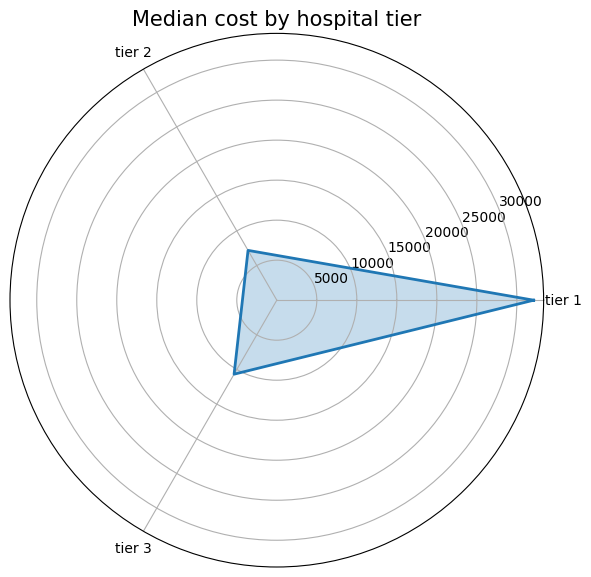

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Variables and data
labels = ['tier 1', 'tier 2', 'tier 3']
num_vars = len(labels)
m_hosp_tier_cos=df_Hospitalisation_details.groupby('Hospital tier')['charges'].median()
values = [m_hosp_tier_cos[0], m_hosp_tier_cos[1], m_hosp_tier_cos[2]]

# Repeat the first value to close the radar chart
values += values[:1]

# Compute angle for each axis in the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.25)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Median cost by hospital tier", size=15)
plt.tight_layout()
plt.savefig('plots/Median_cost_radar_plot.png')
plt.show()

# 12. Number of patients across city tier and hospital tier

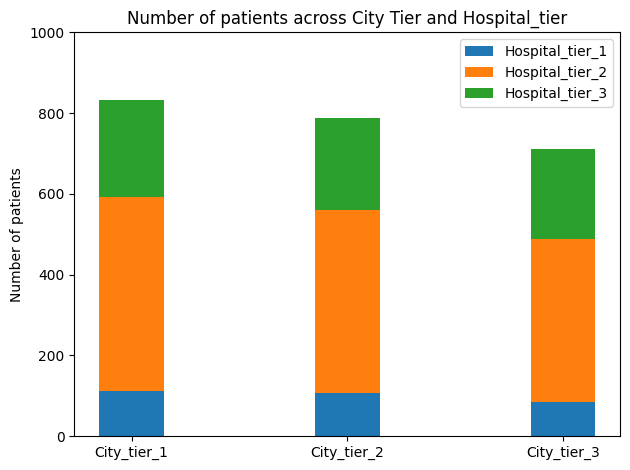

In [93]:
#Frequency table for City Tier and Hospital Tier
freq_city_tier = df_Hospitalisation_details['City tier'].value_counts().rename('City Tier Count')
freq_hospital_tier = df_Hospitalisation_details['Hospital tier'].value_counts().rename('Hospital Tier Count')
combined_freq = pd.concat([freq_city_tier, freq_hospital_tier], axis=1)
#print(combined_freq)
Hospital_tier_1=df_Hospitalisation_details['City tier'][df_Hospitalisation_details['Hospital tier']==0].value_counts()
Hospital_tier_2=df_Hospitalisation_details['City tier'][df_Hospitalisation_details['Hospital tier']==1].value_counts()
Hospital_tier_3=df_Hospitalisation_details['City tier'][df_Hospitalisation_details['Hospital tier']==2].value_counts()
# plot stacked bar 
fig, ax = plt.subplots()
labels=['City_tier_1','City_tier_2','City_tier_3']
x=np.arange(len(labels))
ax.bar(x, Hospital_tier_1, width=0.3, label='Hospital_tier_1')
ax.bar(x, Hospital_tier_2, width=0.3, label='Hospital_tier_2', bottom=Hospital_tier_1)
bottom2 = np.array(Hospital_tier_1) + np.array(Hospital_tier_2)
ax.bar(x, Hospital_tier_3, width=0.3, label='Hospital_tier_3', bottom=bottom2)
# Labels and legend
ax.set_ylabel('Number of patients')
ax.set_ylim(0, 1000)
ax.set_title('Number of patients across City Tier and Hospital_tier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.savefig('plots/stacked_plot.png')
plt.show()

# 13. Correlation between variables using heat map

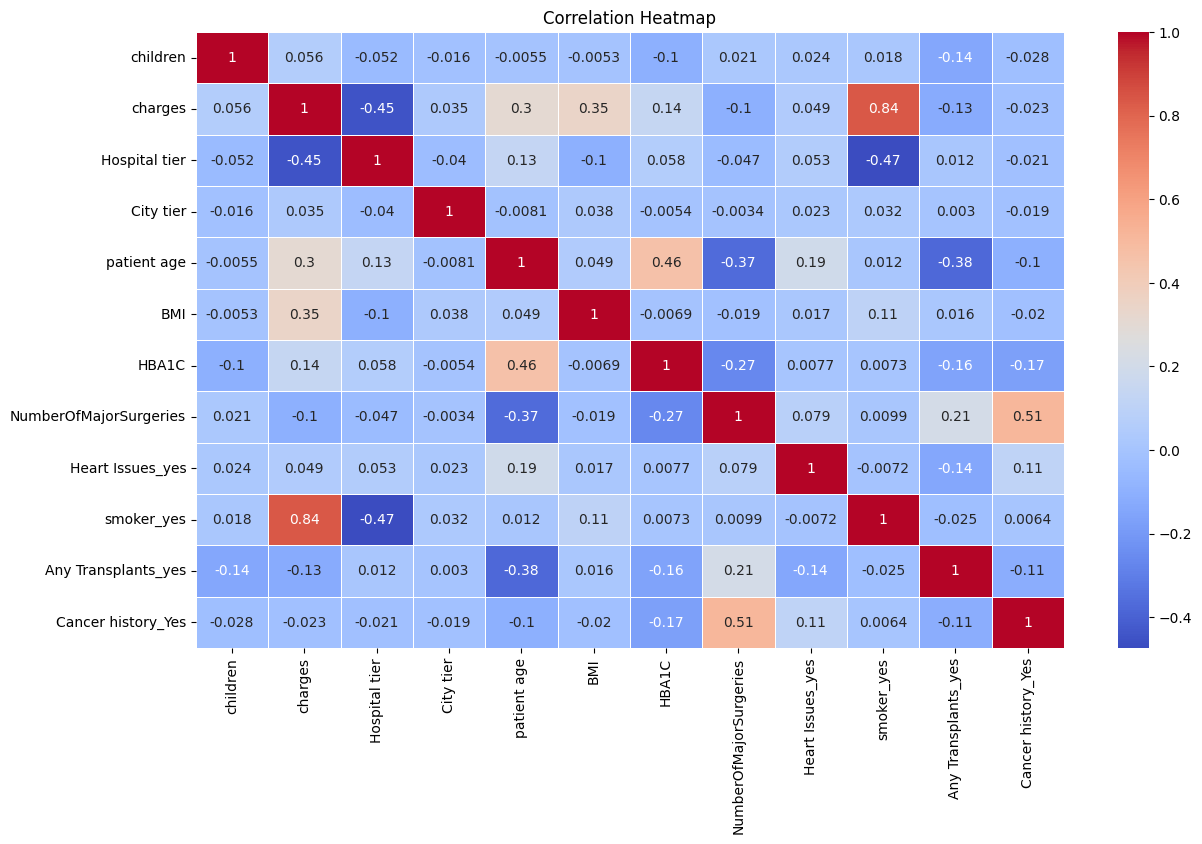

In [94]:
# heatmap creation of all variables
df=pd.merge(df_Hospitalisation_details[['Customer ID','children', 'charges', 'Hospital tier', 'City tier', 'patient age' ]], 
                          df_Medical_Examinations[['Customer ID','BMI', 'HBA1C', 'NumberOfMajorSurgeries', 'Heart Issues_yes', 'smoker_yes',
                                'Any Transplants_yes', 'Cancer history_Yes']], on='Customer ID', how='inner')
corr = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('plots/Heat_map.png')
plt.show()

**Results:**
- Being smoker has strongest positive correlation with `charges`(correlation = 0.84)
- Strongest negative correlation between Hospital tier and being smoker (correlation = - 0.47)
- Weakest correlation between BMI and number of children (correlation = - 0.0053)

# 13. Save cleaned data into a file
Next juypter notebook will use this data and do second part of the project.

In [96]:
df_Hospitalisation_details.to_parquet('data/interim/df_Hospitalisation_details.parquet')
df_Medical_Examinations.to_parquet('data/interim/df_Medical_Examinations.parquet')
df_Names.to_parquet('data/interim/df_Names.parquet')
df.to_parquet('data/interim/df.parquet')